<!DOCTYPE html>

<html>

<head>

<title>Magos da Furadeira</title>

</head>

<body>

<div style="display: flex; align-items: center;">

<img src="https://i.ibb.co/z490FF5/FUNDO-REMOVIDO.png" alt="FUNDO REMOVIDO">

<p style="margin-left: 40px; font-size: 24px; font-weight: bold; border-bottom: 1px solid black;">José David e Gabriel Torquarto - <br> Magos da Furadeira Bosch de Impacto </p>

</div>

</body>

</html>

 

### **Explorando modelos lineares**
**ID:** Modelos 03

**Proponente:** Diana Didatolov (Diana é relativamente nova para a posição de prestígio que ocupa na Biblioteca Real. Isso aconteceu pois ela teve um papel importantíssimo durante a Guerra das Marretas Voadoras, o que resultou na sua promoção dentro da Biblioteca. A diretora anterior, que perdeu seu cargo, é sua arquirrival por conta disso).

**Objetivo:** Se informe sobre outros modelos lineares que existem. Escolha um desses modelos e faça um notebook didático mostrando como este modelo funciona e como ele se difere do modelo linear estudado em sala de aula. Em um conjunto de dados da sua escolha, treine um modelo linear múltiplo e compare o resultado com o modelo linear que você escolheu. Sua comparação deve levar em conta alguma métrica (como RMSE, por exemplo). Gráficos são muito bem-vindos!

**Comentários adicionais:** O scikit-learn tem vários modelos lineares prontos, você pode conferir eles em https://scikit-learn.org/stable/modules/linear_model.html. A explicação aprofundada de cada modelo pode ser encontrada em livros e em vídeos.

**Pontuação máxima:** 30 + 20 pontos.

**Condições para a pontuação extra:** apenas entregas realizadas antes de 12 de setembro concorrem para serem selecionadas para a Biblioteca Real. Apenas uma entrega por modelo será escolhida (o que não quer dizer que se um modelo tiver apenas uma entrega automaticamente fará a entrega ser escolhida). Não é para escolher mais de um modelo na sua entrega.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import statistics as st
import pandas as pd

### **Modelos Lineares** 
Modelos lineares são uma classe de modelos estatísticos, de aprendizado supervisionado, que descrevem uma relação entre uma variável de saída (dependente) e uma variável, ou conjunto de variáveis, preditora(s)  (independente) por meio de combinação linear das variáveis[1]. Em nosso contexto, a variável a ser prevista (y) é nosso target e as variáveis preditoras (x) são os atributos. 
Um exemplo de modelo linear simples é

$$
y = \beta_0 + \beta_1 x,
$$

onde $\beta_0$ é o *intercepto* (o valor no qual a linha ajustada cruza o eixo y) do modelo e $\beta_1$ é a *inclinação* (taxa de mudança). A seguir, um exemplo de modelo linear, desconsiderando dados externos:

Text(0, 0.5, '$y$')

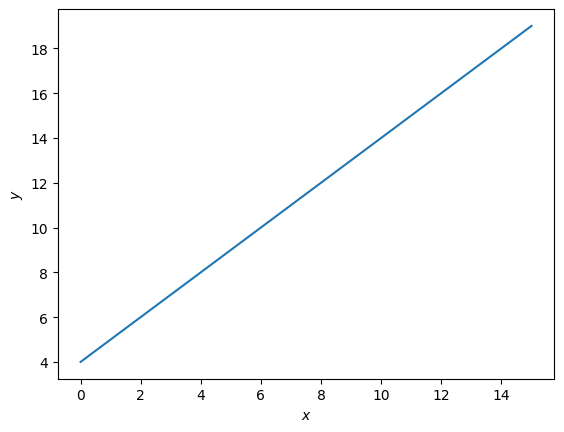

In [3]:
beta0 = 4
beta1 = 1

x = np.linspace(0, 15)
y = beta0 + beta1 * x

figura, eixo = plt.subplots()

eixo.plot(x, y)
eixo.set_xlabel("$x$")
eixo.set_ylabel("$y$")

Dentre os modelos lineares, temos uma infinidade de opções, cada qual com suas especificações e peculiaridades. Dentre esses modelos temos a Regressão de Lasso, Regressão de Rede Elástica (elastic net) e Regressão de Ridge. Para essa apostila, o modelo escolhido foi o "Regressão de Ridge".

### **Regressão de Ridge** 

O modelo de regressão de ridge é um modelo da família dos regressores lineares. Ele se destaca pela sua capacidade de lidar com problemas como onde temos um conjunto de dados multivariados, em que o número de variáveis é maior que o número de amostras, e as variáveis independentes são altamente correlacionadas [2]. Nessas condições, o modelo linear padrão tem um mau desempenho, visto que pode levar a coeficientes de regressão instáveis e difíceis de interpretar. 
 
**Como funciona?**  
Essa técnica consiste em regulzarizar os coeficientes w, ou seja, diminuindo seu tamanho. E isso é realizado adicionando um termo na função de custo (função que quantifica de alguma forma o quão não eficiente nosso modelo é). A seguir, a função de custo comumente utilizada em modelos lineares, o erro quadrático médio (MSE, mean squared error) com o termo de "penalização" já incrementado. [3] [4]

![Alt text](https://estatsite.com.br/wp-content/uploads/2020/07/Captura-de-Tela-2020-07-27-%C3%A0s-21.07.38.png)


A penalização (termo comumente utilizado para se referir ao incremento na função de custo) nessa técnica é por do parâmetro L2. O parâmentro L2 consiste produto de lambda com quadrado dos coeficientes, ao contrário da Regressão de Lasso, que consiste no produto de lambda com módulo dos coeficientes.



**Algumas diferenças entre Regressão de Ridge em relação Regressão Linear Simples:** 1. Diferentemente do modelo linear simples, no de ridge há a regularização e adiciona à penalização aos coeficientes; 2. Coeficientes lineares menores, o que reduz a sensibilidade do modelo a variações nos dados e torna os coeficientes mais estáveis; 3. Utilidade em modelos em que as variáveis independentes apresentam multicolinearidade. 

### **Comparação com o modelo linear múltiplo**

In [16]:
#Ridge
#importando dataset de pinguins

pinguins = sbn.load_dataset('penguins', cache=True, data_home=None)
display(pinguins)
print("\n Tipos de variável:\n", pinguins.dtypes)
print("\n Tipos de variável(convertidas):\n", pinguins.convert_dtypes().dtypes)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female



 Tipos de variável:
 species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

 Tipos de variável(convertidas):
 species              string[python]
island               string[python]
bill_length_mm              Float64
bill_depth_mm               Float64
flipper_length_mm             Int64
body_mass_g                   Int64
sex                  string[python]
dtype: object


In [17]:
pinguins = pinguins.drop('island',axis=1)
pinguins = pinguins.drop('species',axis=1)
pinguins = pinguins.drop('sex',axis=1)

In [7]:
pinguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,Female


In [18]:
pinguins = pinguins.dropna()
#removendo Nans 

In [19]:
print(pinguins.isnull().sum())


bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


In [20]:
X = pinguins.drop('body_mass_g',axis=1).values
Y = pinguins['body_mass_g'].values


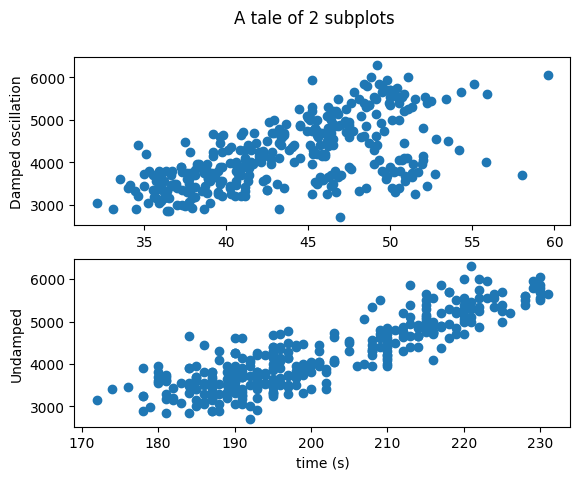

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

ax1.plot(pinguins['bill_length_mm'], pinguins['body_mass_g'], 'o')
ax1.set_ylabel('Damped oscillation')

ax2.plot(pinguins['flipper_length_mm'], pinguins['body_mass_g'], 'o')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()